<a href="https://colab.research.google.com/github/KapilKhanal/CS131/blob/master/Markov_HWcs445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observation(T or F) as a string for as many days as you want,Example("TFTFTFTF") TTTTTTTTT
The result after  9 many days is [[0.89674555]
 [0.10325445]]


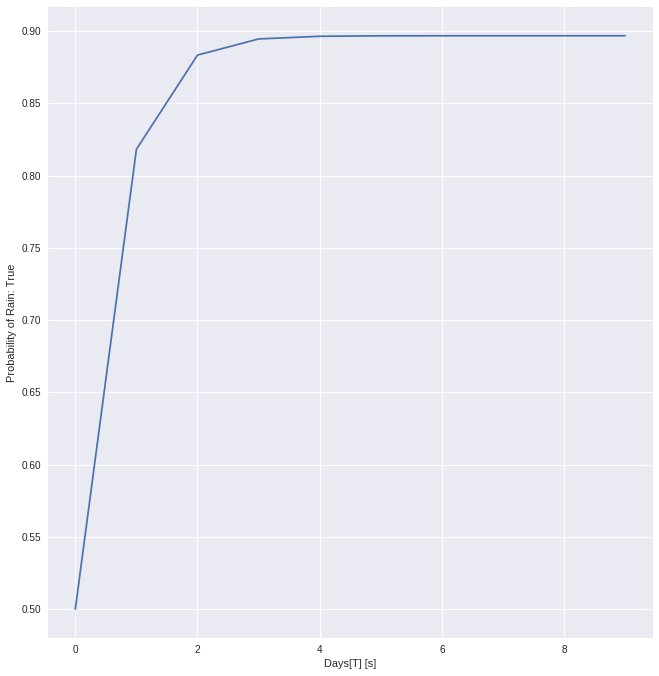

In [0]:
#User will provide True, False as T and F for the observation.
import numpy as np
import matplotlib.pyplot as plt
def umbrella_func(list_observation,transition_matrix):
  O_TRUE = np.matrix([[0.9,0],[0,0.2]])
  O_FALSE = np.matrix([[0.1,0],[0,0.8]])
  RO_prior = np.matrix([[0.5],[0.5]])
  normalize = lambda x:x/x.sum()
  
  result = RO_prior
  
  probabilities = [RO_prior[0]]
  
  for observation in list_observation:
    if observation == 'T':
      observation_matrix = O_TRUE
    elif observation == 'F':
      observation_matrix = O_FALSE
    else:
      raise "Error on input. Did it rain or nor?"
 
    result = normalize(observation_matrix * transition_matrix.transpose()*result) 
   
    probabilities.append(np.float(result[0]))
    #plotting
  print("The result after ",len(observation_string) ,"many days is",result)
  
  fig, ax = plt.subplots(figsize=(12, 12))
  fig.subplots_adjust(bottom=0.15, left=0.2)
  time = list(range(0,len(list_observation)+1))
  ax.plot(time,probabilities)
  ax.set_xlabel('Days[T] [s]')
  ax.set_ylabel('Probability of Rain: True')
  plt.savefig("Probabiltychart.png")
  plt.show()
 

  
  
  return result
  
if __name__ == "__main__":
  
  observation_string = str(input("Observation(T or F) as a string for as many days as you want,Example(\"TFTFTFTF\") "))
  observationList = [char for char in observation_string]
  
  transitionMatrix = np.matrix([[0.7, 0.3],
                [0.3, 0.7]])
  
  r = umbrella_func(observationList,transitionMatrix)
  

In [0]:
import numpy as np
transition_matrix = np.matrix([[0,1/2,0,1/2,0,0,0,0,0],
                              [1,0,0,0,0,0,0,0,0],
                              [0,0,0,0,0,0,0,0,0],
                              [1/2,0,0,0,0,0,1/2,0,0],
                              [0,0,0,0,0,0,0,0,0],
                              [0,0,0,0,0,0,0,0,1],
                              [0,0,0,1/2,0,0,0,1/2,0],
                              [0,0,0,0,0,0,1/2,0,1/2],
                              [0,0,0,0,0,1/2,0,1/2,0]])

In [0]:
sensor_model = np.zeros((9,9))
sensor_model[0,0] = ((0.85)**2)*(.15)**2
sensor_model[1,1] =((0.85)**3)*(.15)**1
sensor_model[2,2] =0
sensor_model[3,3] =((0.85)**2)*(.15)**2
sensor_model[4,4] =0
sensor_model[5,5] =((0.85)**3)*(.15)**1
sensor_model[6,6] =((0.85)**4)
sensor_model[7,7] =((0.85)**2)*(.15)**2
sensor_model[8,8] =((0.85)**2)*(.15)**2

sensor_model


array([[0.01625625, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09211875, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01625625, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09211875, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52200625, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01625625, 0.        ],


In [0]:
prior = np.matrix([[((0.85)**2)*(.15)**2,((0.85)**3)*(.15)**1,((0.85)**2)*(.15)**2,
                    ((0.85)**2)*(.15)**2,((0.85)**2)*(.15)**2,((0.85)**2)*(.15)**2,
                    ((0.85)**2)*(.15)**2,((0.85)**2)*(.15)**2,((0.85)**3)*(.15)**1]])
prior = prior.T #it should be 9 by 1 not 1 by 9 so transpose
prior.shape

(9, 1)

In [0]:
 normalize = lambda x:x/x.sum()
normalize((sensor_model*transition_matrix.T)*prior)

matrix([[0.0978836 ],
        [0.04497354],
        [0.        ],
        [0.01587302],
        [0.        ],
        [0.25485009],
        [0.50970018],
        [0.05291005],
        [0.02380952]])